<b><font color="red" size="6">ch12. 데이터 프레임과 시리즈(Pandas)</font></b>

# 9절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 Group by
cf. pivot_table

In [2]:
# 1) 그룹화 방법1
#    df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris_grouped = iris.groupby(iris.Species)
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [3]:
iris_grouped_sum.loc[['setosa','virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [4]:
print(iris_grouped_sum.columns)
print(iris_grouped_sum.index)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


In [5]:
iris_grouped_sum.reset_index(inplace=True) # index를 컬럼 데이터로 편입

In [6]:
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [7]:
# iris_grouped_sum에서 setosa 그룹함수 결과만 추출
iris_grouped_sum[iris_grouped_sum['Species']=='setosa']
iris_grouped_sum[iris_grouped_sum.Species=='setosa']
iris_grouped_sum.loc[iris_grouped_sum.Species=='setosa']

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3


In [8]:
# iris_grouped_sum에서 setosa와 virginica 그룹함수 결과만 추출
iris_grouped_sum[ (iris_grouped_sum.Species=='setosa') |
                  (iris_grouped_sum.Species=='virginica')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [9]:
iris_grouped_sum[iris_grouped_sum.Species.isin(['setosa', 'virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [10]:
# 1) 그룹화 방법1.1 : 그룹핑할 때 index를 컬럼 데이터로 편입(reset_index 가 필요 X)
#    df.groupby(by=[그룹핑할열], as_index=False)[함수적용해서출력할열들].기초통계함수()
    # [함수적용해서출력할열들] : 모든 열이 적용됨
iris.groupby(iris.Species, as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [11]:
display(iris.groupby(iris.Species).sum())
display(iris.groupby(['Species']).sum())
display(iris.groupby('Species').sum())

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [12]:
# 종별 Sepal.Length와 Sepal.Width의 평균
iris.groupby('Species').mean()[['Sepal.Length','Sepal.Width']]
iris.groupby('Species')[['Sepal.Length','Sepal.Width']].mean()

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [13]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')['Sepal.Length'].sum() # 결과가 시리즈(1차원)

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [14]:
# 종별 Sepal.Length의 합계
iris.groupby('Species')[['Sepal.Length']].sum() # 결과가 데이터프레임

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [15]:
# 1) 그룹화 방법1
# df.groupby(by=[그룹핑할열])[함수적용해서출력할열들].기초통계함수()
# 2) 그룹화 방법2
# df.pivot_table(index='그룹화할 필드',
#                values=['함수적용해서출력할열들'],
#                aggfunc='함수명(기본값:mean)')
iris.pivot_table(index='Species') # 종별 평균들

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [16]:
# iris.groupby('Species')[['Sepal.Length', 'Sepal.Width']].sum()
iris.pivot_table(index='Species',
                 values=['Sepal.Length', 'Sepal.Width'],
                 aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [17]:
iris.groupby('Species').count() # 결측치를 제외한 데이터 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [18]:
iris.pivot_table(index='Species',
                 aggfunc='count') # 결측치를 제외한 데이터 갯수

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [19]:
import random
random.sample(range(len(iris)), 2)

[5, 81]

In [20]:
iris.shape[1]-1 # iris의 독립변수 열 갯수

4

In [21]:
# 각 열에 임의의 행에 결측치를 할당(0번째열은 결측치1개, 1번째열은 결측치2개, ... 3번째열은 결측치4개)
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(len(iris)), col+1), col] = np.nan

In [22]:
iris.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,49,49
versicolor,50,50,49,49
virginica,49,48,49,48


In [23]:
result = iris.pivot_table(index='Species',
                 aggfunc='count')
result = result[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,49,49
versicolor,50,50,49,49
virginica,49,48,49,48


In [24]:
iris['Species'].value_counts() # 종별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 다중열로 그룹화

In [25]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [26]:
# iris로 다중열 그룹화하기 위해서 데이터 추가(num 필드)
# iris의 행수가 150개 = Species 3그룹, num 6그룹
[[i]*25 for i in range(6)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]

In [27]:
import numpy as np
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [28]:
# 종별, num별 합계
r = iris.groupby(['Species', 'num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         87.0          36.5          6.2
           1           124.6         84.4          35.3          5.5
versicolor 2           150.3         69.4         107.8         32.3
           3           146.5         69.1         101.9         32.7
virginica  4           164.4         70.0         136.1         46.6
           5           158.1         72.5         136.6         50.2

In [29]:
r.index

MultiIndex([(    'setosa', 0),
            (    'setosa', 1),
            ('versicolor', 2),
            ('versicolor', 3),
            ( 'virginica', 4),
            ( 'virginica', 5)],
           names=['Species', 'num'])

In [30]:
r.loc[['setosa', 'virginica']] # setosa와 virginica만 결과 추출

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          35.3          5.5
virginica 4           164.4         70.0         136.1         46.6
          5           158.1         72.5         136.6         50.2

In [31]:
# 종별, num별 중위수 ('Species', 'num'이 컬럼 데이터로 편입)
r = iris.groupby(['Species', 'num'], as_index=False).median()
r

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.0,3.4,1.50,0.2
1,setosa,1,5.0,3.4,1.50,0.2
2,versicolor,2,6.1,2.8,4.50,1.4
3,versicolor,3,5.7,2.8,4.25,1.3
4,virginica,4,6.5,2.9,5.65,2.0
5,virginica,5,6.4,3.0,5.50,2.0


In [32]:
# setosa와 virginica 추출
r[(r['Species'] == 'setosa') | (r['Species'] == 'virginica')]
r[ r['Species'].isin(['setosa', 'virginica'])]

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.0,3.4,1.50,0.2
1,setosa,1,5.0,3.4,1.50,0.2
4,virginica,4,6.5,2.9,5.65,2.0
5,virginica,5,6.4,3.0,5.50,2.0


In [33]:
# iris.groupby(by=['Species', 'num']).sum()와 동일
iris.pivot_table(index=['Species', 'num'],
                 # values=[],
                 aggfunc='sum')

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species    num                                                      
setosa     0            36.5          6.2         125.7         87.0
           1            35.3          5.5         124.6         84.4
versicolor 2           107.8         32.3         150.3         69.4
           3           101.9         32.7         146.5         69.1
virginica  4           136.1         46.6         164.4         70.0
           5           136.6         50.2         158.1         72.5

In [34]:
# 종별 기초 통계량(min, max, count, mean, median, Q1, Q3, std, ...) 모두
iris.groupby(['Species']).describe()

Sepal.Length                                               \
                  count      mean       std  min  25%  50%  75%  max   
Species                                                                
setosa             50.0  5.006000  0.352490  4.3  4.8  5.0  5.2  5.8   
versicolor         50.0  5.936000  0.516171  4.9  5.6  5.9  6.3  7.0   
virginica          49.0  6.581633  0.640857  4.9  6.2  6.5  6.9  7.9   

           Sepal.Width           ... Petal.Width        num                 \
                 count     mean  ...         75%  max count mean       std   
Species                          ...                                         
setosa            50.0  3.42800  ...         0.3  0.5  50.0  0.5  0.505076   
versicolor        50.0  2.77000  ...         1.5  1.8  50.0  2.5  0.505076   
virginica         48.0  2.96875  ...         2.3  2.5  50.0  4.5  0.505076   

                                     
            min  25%  50%  75%  max  
Species                              
setosa      0.0  0.0  0.5  1.0  1.0  
versicolor  2.0  2.0  2.5  3.0  3.0  
virginica   4.0  4.0  4.5  5.0  5.0  

[3 rows x 40 columns]

In [35]:
iris.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  49.000000
             mean    5.006000    5.936000   6.581633
             std     0.352490    0.516171   0.640857
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.200000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  48.000000
             mean    3.428000    2.770000   2.968750
             std     0.379064    0.313798   0.327568
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.125000
             max     4.400000    3.400000   3.800000
Petal.Length count  49.000000   49.000000  49.000000
             mean    1.465306    4.279592   5.565306
             std     0.173867    0.453679   0.549451
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.400000   5.600000
             75%     1.600000    4.600000   5.900000
             max     1.900000    5.100000   6.900000
Petal.Width  count  49.000000   49.000000  48.000000
             mean    0.238776    1.326531   2.016667
             std     0.093131    0.199766   0.271586
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.500000    1.800000   2.500000
num          count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

In [36]:
g = iris.groupby(['Species'])[['Sepal.Length',
                               'Sepal.Width',
                               'Petal.Length',
                               'Petal.Width']].mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006000,3.42800,1.465306,0.238776
versicolor,5.936000,2.77000,4.279592,1.326531
virginica,6.581633,2.96875,5.565306,2.016667


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

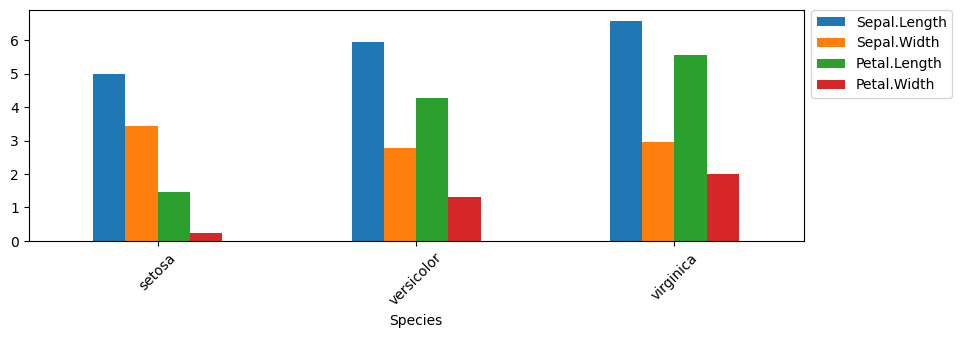

In [37]:
import matplotlib.pyplot as plt
g.plot(kind='bar', figsize=(10, 3), rot=45)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.show()

In [38]:
# 종별 평균
g = iris.groupby(['Species', 'num']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0          5.0280     3.480000      1.460000     0.248000
           1          4.9840     3.376000      1.470833     0.229167
versicolor 2          6.0120     2.776000      4.312000     1.345833
           3          5.8600     2.764000      4.245833     1.308000
virginica  4          6.5760     2.916667      5.670833     2.026087
           5          6.5875     3.020833      5.464000     2.008000

In [39]:
# g의 level0 인덱스만 그대로 두고, level1 인덱스를 컬럼값으로 올려
g.unstack()

Sepal.Length                                    Sepal.Width         \
num                   0      1      2     3      4       5           0      1   
Species                                                                         
setosa            5.028  4.984    NaN   NaN    NaN     NaN        3.48  3.376   
versicolor          NaN    NaN  6.012  5.86    NaN     NaN         NaN    NaN   
virginica           NaN    NaN    NaN   NaN  6.576  6.5875         NaN    NaN   

                          ... Petal.Length                             \
num             2      3  ...            2         3         4      5   
Species                   ...                                           
setosa        NaN    NaN  ...          NaN       NaN       NaN    NaN   
versicolor  2.776  2.764  ...        4.312  4.245833       NaN    NaN   
virginica     NaN    NaN  ...          NaN       NaN  5.670833  5.464   

           Petal.Width                                              
num                  0         1         2      3         4      5  
Species                                                             
setosa           0.248  0.229167       NaN    NaN       NaN    NaN  
versicolor         NaN       NaN  1.345833  1.308       NaN    NaN  
virginica          NaN       NaN       NaN    NaN  2.026087  2.008  

[3 rows x 24 columns]

In [40]:
g.unstack().T

Species             setosa  versicolor  virginica
             num                                 
Sepal.Length 0    5.028000         NaN        NaN
             1    4.984000         NaN        NaN
             2         NaN    6.012000        NaN
             3         NaN    5.860000        NaN
             4         NaN         NaN   6.576000
             5         NaN         NaN   6.587500
Sepal.Width  0    3.480000         NaN        NaN
             1    3.376000         NaN        NaN
             2         NaN    2.776000        NaN
             3         NaN    2.764000        NaN
             4         NaN         NaN   2.916667
             5         NaN         NaN   3.020833
Petal.Length 0    1.460000         NaN        NaN
             1    1.470833         NaN        NaN
             2         NaN    4.312000        NaN
             3         NaN    4.245833        NaN
             4         NaN         NaN   5.670833
             5         NaN         NaN   5.464000
Petal.Width  0    0.248000         NaN        NaN
             1    0.229167         NaN        NaN
             2         NaN    1.345833        NaN
             3         NaN    1.308000        NaN
             4         NaN         NaN   2.026087
             5         NaN         NaN   2.008000

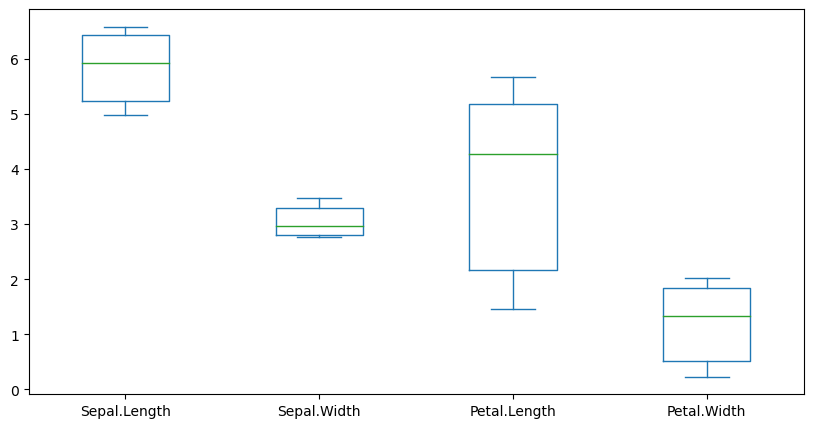

In [41]:
g.plot(kind='box', figsize=(10, 5))
plt.show()

## 9.2 그룹간 데이터 처리

In [42]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [43]:
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.head(3))
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,NaN,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


In [44]:
# 종별 임의의 표본 5개씩 출력
# iris.sample(5).sort_index()
for idx, (speciesname, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciesname))
    display(group.sample(5).sort_index())

0번째 그룹은 setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
6,4.6,3.4,1.4,0.3,setosa,0
26,5.0,3.4,1.6,0.4,setosa,1
36,5.5,3.5,1.3,0.2,setosa,1
37,4.9,3.6,1.4,0.1,setosa,1
46,5.1,3.8,1.6,0.2,setosa,1


1번째 그룹은 versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
52,6.9,3.1,4.9,1.5,versicolor,2
54,6.5,2.8,4.6,1.5,versicolor,2
62,6.0,2.2,4.0,1.0,versicolor,2
84,5.4,3.0,4.5,1.5,versicolor,3
85,6.0,3.4,4.5,1.6,versicolor,3


2번째 그룹은 virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
109,7.2,3.6,6.1,2.5,virginica,4
111,6.4,2.7,5.3,1.9,virginica,4
116,6.5,3.0,5.5,1.8,virginica,4
128,6.4,2.8,5.6,2.1,virginica,5
135,7.7,3.0,6.1,2.3,virginica,5


In [45]:
# 종별 0, 10, 20, 30, 40번째 데이터 출력: s:0, 10, 20, 30, 40행, vc: 50, 60, 70, 80, 90, vn: 100, 110, ...
for idx, (speciesname, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciename))
    display(group.iloc[::10]) # group.iloc[0, 10, 20, 30, 40]

NameError: name 'speciename' is not defined

## 9.3 데이터 프레임 그룹 인덱싱

In [46]:
t = iris.groupby('Species').take([0, 10, 20, 30, 40])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          NaN    4
           110           6.5          NaN           5.1          NaN    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

In [47]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,1
40,5.0,3.5,1.3,0.3,1


## 9.4 레이블(One-Hot Encoding)

In [48]:
iris.drop('num', axis=1, inplace=True)

In [49]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# 레이블(One-Hot Encoding)을 지원하는 패키지 이용
# preprocessing 모듈의 LabelEncoder 클래스
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체
iris['target'] = le.fit_transform(iris.Species)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,6.0,NaN,virginica,2
125,7.2,3.2,6.0,1.8,virginica,2


# 10절. 데이터 구조 변경
## 10.1 와이드포맷 <-> 롱포맷
- 판다스 공식 문서에 나오는 melt: https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf ) 7page


In [51]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.2 melt를 이용한 언피벗팅(와이드포맷 -> 롱포맷)

In [52]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [53]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'],
                                    var_name='변수', # melt된 열의 이름
                                    value_name='값') # 데이터가 된 열의 이름
airquality_melted = airquality_melted.sort_values(by=['Month', 'Day'])
airquality_melted = airquality_melted.reset_index(drop=True)
airquality_melted

,Month,Day,변수,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


### melt 연습하기 예제(와이드포맷 -> 롱포맷)

In [54]:
%ls D:\ai\Downloads\shareData

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: B014-9C57

 D:\ai\Downloads\shareData 디렉터리

2024-11-25  오후 02:50    <DIR>          .
2024-11-25  오후 02:50    <DIR>          ..
2024-11-25  오후 12:42    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:57           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  225,548,619,776 바이트 남음


In [55]:
df_first = pd.read_csv(r'D:\ai\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding='cp949')
df_last = pd.read_csv(r'D:\ai\Downloads\shareData\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv',
                      encoding='cp949')
df_first.shape, df_last.shape

((17, 22), (9010, 5))

In [56]:
df_first.head(1) # => new_first(지역명, 연도, 월, 분양가격(제곱미터))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [57]:
df_last.head(1) # => new_last(모든면적 행만 지역명, 연도, 월, 분양가격(제곱미터))

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [58]:
# 지역 연도월 평당분양가격 식의 롱포맷 데이터로 바꾸기
new_first = df_first.melt(id_vars='지역',
                          var_name='연도월',
                          value_name='평당분양가격')
new_first.sample(1)
# new_first = df_first_melted.reset_index(drop=True)
# new_first

,지역,연도월,평당분양가격
323,서울,2015년7월,18152


In [59]:
# 연도월 컬럼을 연도, 월로 분리 "2013년12월" => 2013, 12
def parse_year(x):
    return int(x.split('년')[0])
parse_year("2013년12월")

2013

In [60]:
# new_first['연도월'].map(parse_year) # map은 1차원에서 가능
# new_first['연도월'].map(lambda x: int(x.split('년')[0])) # map은 1차원에서 가능
new_first['연도'] = new_first['연도월'].apply(parse_year) # apply는 1,2차원 모두 가능
new_first.head(1)

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [61]:
def parse_month(x):
    return x.split('년')[1].replace('월', '') # [:-1]
parse_month("2013년12월")

'12'

In [62]:
new_first['월'] = new_first['연도월'].map(lambda x: x.split('년')[1].replace('월', ''))
new_first.tail(1)

,지역,연도월,평당분양가격,연도,월
356,제주,2015년8월,7343,2015,8


In [63]:
# 평당분양가격/3.3 => 분양가격(제곱미터)
new_first['분양가격(제곱미터)'] = new_first['평당분양가격']/3.3
new_first.sample(1)

,지역,연도월,평당분양가격,연도,월,분양가격(제곱미터)
99,경북,2014년5월,6409,2014,5,1942.121212


In [64]:
# '연도월', '평당분양가격' 필드 삭제, column명을 지역 -> 지역명
new_first.drop(['연도월', '평당분양가격'], axis=1, inplace=True)

In [65]:
new_first.columns = ['지역명', '연도', '월', '분양가격(제곱미터)']
new_first.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


In [66]:
# df_last => new_last(모든면적 행만 지역명, 연도, 월, 분양가격(제곱미터))
new_last = df_last[df_last['규모구분'] == '모든면적']
new_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
5,인천,모든면적,2015,10,3163
10,경기,모든면적,2015,10,3138
15,부산,모든면적,2015,10,3112
20,대구,모든면적,2015,10,2682
...,...,...,...,...,...
8985,전북,모든면적,2024,7,3645
8990,전남,모든면적,2024,7,3970
8995,경북,모든면적,2024,7,4190
9000,경남,모든면적,2024,7,4033


In [67]:
# new_last의 규모구분 열 삭제
new_last.drop(['규모구분'], axis=1, inplace=True)
new_last.head(1)

C:\Users\4545\AppData\Local\Temp\ipykernel_13100\2587134262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_last.drop(['규모구분'], axis=1, inplace=True)


,지역명,연도,월,분양가격(제곱미터)
0,서울,2015,10,5841


In [68]:
new_first.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182


In [69]:
df = pd.concat( [new_first, new_last])
df.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


## 10.3 pivot_table을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [70]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])
airquality_melted = airquality_melted.sort_values(['Month', 'Day']).reset_index(drop=True)
airquality_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


In [71]:
airquality2 = airquality_melted.pivot_table(index=['Month', 'Day'],
                                            columns=['variable'],
                                            values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [72]:
airquality2.reset_index(level=['Month', 'Day'], 
                        col_level=1,
                        inplace=True)
airquality2.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [73]:
airquality2.columns = airquality2.columns.droplevel(level=0) # 0번 level의 컬럼 제거

In [74]:
airquality2.head(1)

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


In [75]:
airquality2.columns.name = ''
airquality2.head(1)

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


### pivot_table(), pivot() 함수의 차이

In [76]:
import numpy as np
year = [2020]*3 + [2021]*3
mon = [1, 2, 3]*2
latte = [410, 401, 402, 400, 404, 405]
americano = [500, 483, 484, 470, 486, 488]
mocha = [350, 299, 300, 301, 302, 300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                     columns=['year', 'mon', 'latte', 'americano', 'mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [77]:
sales.groupby(['year'])[['latte', 'americano', 'mocha']].sum()

,latte,americano,mocha
year,,,
2020,1213,1467,949
2021,1209,1444,903


In [78]:
result = sales.pivot_table(index='year',
                           values=['latte', 'americano', 'mocha'],
                           aggfunc='sum')
result

,americano,latte,mocha
year,,,
2020,1467,1213,949
2021,1444,1209,903


In [79]:
result.loc[2021]

americano    1444
latte        1209
mocha         903
Name: 2021, dtype: int32

In [80]:
# pivot()
sales = sales.loc[:, 'year':'latte']
sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [81]:
sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

##  11절. 데이터프레임에 함수 적용시키기
- apply(func, axis): (데이터프레임이나 시리즈 모두 적용 가능)
- applymap(func): 각 요소별로 적용 (데이터프레임에서만 가능)
- map(func): 각 요소별로 적용(1차원 시리즈에서만 가능)

## 11.1 apply

In [82]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    5 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [83]:
def get_month(str):
    return int(str.split('-')[1])
get_month('2001-01-01')

1

In [84]:
member[member['Birth'].apply(lambda str: int(str.split('-')[1]) ) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [85]:
# ex2. 2차원 데이터프레임에 apply 적용(axis)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [86]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.1+ KB


In [87]:
def year_month(series):
    return str(series['연도']) + '년' + str(series['월']) + '월'
year_month(df_last.loc[0])

'2015년10월'

In [88]:
df_last['연도월'] = df_last.apply(lambda series: str(series['연도']) + '년' + str(series['월']) + '월',
                                  axis=1)
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월


In [89]:
# ex3. iris 데이터의 apply
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [90]:
X = iris.iloc[:, :-1]
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [91]:
X.apply(np.sum, axis=0) # 열별 sum

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [92]:
X.apply(np.sum, axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [93]:
# X의 열별 평균
avg = X.apply(np.average, axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [94]:
X.apply(lambda x: round(x-avg, 2), axis=1) # 행별 평균과의 거리 소수점 2자리까지 출력

,sepal_length,sepal_width,petal_length,petal_width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


## 11.2 applymap

In [95]:
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [96]:
X.applymap(lambda x : x**2)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


In [97]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [98]:
member[member['Birth'].map(lambda date_str : int(date_str.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


# 12절. 일괄 변경하기(결측치나 특정값)
## 12.1 fillna (결측치를 어떤 값으로 바꿈)
- 대부분 결측치는 drop하거나, 평균값대체, 최빈값대체, 중위수대체, 그룹별 평균값, 이전값으로 대체,
             다음값으로 대체, 회귀식결과값으로 대체함

In [100]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3, 4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                  [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [101]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [102]:
# 결측치를 이전행의 값으로 대체
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [103]:
# 결측치를 다음행의 값으로 대체
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [105]:
# 결측치를 특정 대체값으로 바꿈
values = {'A':99, 'B':98, 'C':97, 'D':96}
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [146]:
# 결측치를 열별 평균으로 바꿈
df.fillna(value=df.mean(axis=0))

C:\Users\4545\AppData\Local\Temp\ipykernel_13100\3710969568.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value=df.mean(axis=0))


,name,age,born
0,홍,25.0,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,25.0,NaN


In [107]:
df.fillna(value=values, limit=3) # 결측치 대체는 3번째 행까지만

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 12.2 replace(to_value, new_value, inplace=T/F)
- to_value를 new_value로 변경
- 정규표현식을 이용 가능

In [110]:
s = pd.Series([0, 1, 2, 3, None])
s.replace(np.nan, 0, inplace=True)
s.replace([0,1], 99) # 0이나 1을 99로 변경

0    99.0
1    99.0
2     2.0
3     3.0
4    99.0
dtype: float64

In [111]:
s = pd.Series([0,1,2,3,None])
s.replace([0,1,2], [100,101,102])

0    100.0
1    101.0
2    102.0
3      3.0
4      NaN
dtype: float64

In [112]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                  'B' : ['abc','bar','xyz']})

In [113]:
df.replace(r'^ba.+$','XXX',regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXX,xyz


In [114]:
df.replace({'A':'bat','B':'abc'}, 'XXX')

,A,B
0,XXX,XXX
1,foo,bar
2,bait,xyz


## 12.3 where(조건), mask(조건)
    - where(조건) : 조건이 만족하는 요소는 그대로 출력하고 만족하지 않는 요소는 결측치로
    - mask(조건) : where의 반대

In [115]:
s = pd.Series(range(10,20))
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [116]:
s[s>15] # 조건이 만족되는 데이터만 출력

6    16
7    17
8    18
9    19
dtype: int64

In [117]:
s.where(s>15) # 조건이 만족되는 데이터는 그대로 출력. 만족되지 않은 데이터는 결측치

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [118]:
s.mask(s>15)

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
- 결측치가 있는 데이터 누락(행기준, 열기준)

In [119]:
df = pd.DataFrame({'name': ['홍','김','이',np.nan],
                  'age' : [np.nan, 20, 30, np.nan],
                  'born' : ['서울','부산',np.nan,np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [120]:
df.dropna() # 결측치가 하나라도 있는 행은 제거 inplace=True가 아니면 return

,name,age,born
1,김,20.0,부산


In [121]:
df.dropna(subset=['name','age']) # name 열과 age열에 결측치가 하나라도 있는 행 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [122]:
df.dropna(how='all') # 모두 결측치인 행만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN


In [124]:
df.dropna(axis=1) # 결측치가 하나라도 있는 열을 모두 삭제

""
0
1
2
3


In [126]:
df.dropna(axis=1, how='all') # 모두 결측치인 열만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [127]:
## 12절 연습 퀴즈
# 1단계 : iris 데이터에서 결측치를 인위적으로 random하게 열 마다 20씩 결측치를 할당한다
import random
print(random.sample(range(150),20))

[22, 80, 85, 2, 62, 61, 102, 64, 45, 39, 120, 100, 104, 131, 5, 138, 143, 28, 34, 93]


In [136]:
# iris 가져와서 랜덤하게 열마다 20개씩 결측치 할당
import seaborn as sns
iris = sns.load_dataset('iris')
iris
for i in range(5):
    iris.iloc[random.sample(range(150),20),i]=np.nan

In [137]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,NaN,1.3,0.2,setosa
3,NaN,3.1,NaN,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,NaN,1.9,virginica
147,NaN,3.0,5.2,2.0,virginica
148,6.2,3.4,NaN,2.3,virginica


In [144]:
# 2단계 : 결측치가 있는 iris데이터를 출력한다 결측치 여부 return 함수 : isna(), isnull()
# iris['sepal_length'].isna()
iris[(iris['sepal_length'].isna()) | (iris['sepal_width'].isna()) |
     (iris['petal_length'].isna()) | (iris['petal_width'].isna()) |
     (iris['species'].isna())]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,NaN,1.3,0.2,setosa
3,NaN,3.1,NaN,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
7,5.0,3.4,1.5,0.2,NaN
10,5.4,3.7,1.5,NaN,setosa
...,...,...,...,...,...
144,6.7,NaN,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,NaN
146,6.3,2.5,NaN,1.9,virginica
147,NaN,3.0,5.2,2.0,virginica


In [148]:
# 3단게 : 결측치를 열평균으로 대체된 iris 데이터를 출력한다(inplace=True)
iris.fillna(value=iris.mean(axis=0))

C:\Users\4545\AppData\Local\Temp\ipykernel_13100\273084466.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.fillna(value=iris.mean(axis=0))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.500000,1.400000,0.2,setosa
1,4.90,3.000000,1.400000,0.2,setosa
2,4.70,3.072308,1.300000,0.2,setosa
3,5.84,3.100000,3.686154,0.2,setosa
4,5.00,3.072308,1.400000,0.2,setosa
...,...,...,...,...,...
145,6.70,3.000000,5.200000,2.3,NaN
146,6.30,2.500000,3.686154,1.9,virginica
147,5.84,3.000000,5.200000,2.0,virginica
148,6.20,3.400000,3.686154,2.3,virginica
